# Simulatie - les 1

Notebook bij les 1 van de leerlijn simulatie van S3 - AI. 

© Auteur: Joost Vanstreels

Dit notebook bevat theorie en oefenopdrachten voor de leerlijn Simulatie van het Data Science semester van AI. Het doel van deze lessenreeks is begrip krijgen over het nut van het simuleren van bepaalde processen, het uitvoeren van experimenten en het analyseren van verschillende scenario's. We zullen gebruik maken van een simulatieomgeving om experimenten uit te voeren en een Streamlit dashboard om analyses uit te voeren.

De lessen zijn als volgt opgebouwd:
- In les 1 introduceren we verschillende vormen van simuleren, gebruiken we een Finite-state machine om processen te modelleren en voeren we de eerste experimenten uit.
- In les 2 gaan we in de simulatieomgeving verschillende simulaties runnen en visualisaties maken om deze resultaten te analyseren en data-gedreven beslissingen te nemen. 
- In les 3 maken we de overstap van historische data naar synthetische data. We zullen zelf synthetische data genereren op basis van de historische data. 
- In les 4 gaan we simulaties runnen op basis van de synthetische data. Dat brengt meer complexiteit met zich mee qua experimenten, visualisaties en analytics.

Na deze lessen kun je het portfolio-item 'Simulatie' maken. 

**Voorbereiding voor les 1:**

Zorg dat alle software geïnstalleerd is:
- Zorg dat alle ```python``` libraries geïnstalleerd zijn;
- Installeer ook de Graphviz software: https://graphviz.org/download/. Test of de visualisaties onder Finite-state machine werken;
- Maak ook een *fork* van de ```S3 DATASIM``` repo: (https://github.com/AI-S3-2025/datasim). Check of deze werkt door onder ```Run and Debug``` voor ```Debug with Streamlit``` te kiezen, daarna worden de resultaten getoond in een Streamlit dashboard.

Bekijk de volgende video over een simulatie over de Covid pandemie https://www.youtube.com/watch?v=gxAaO2rsdIs&pp=0gcJCfwAo7VqN5tD (tot in ieder geval 12:57) en beantwoord de volgende vragen:
1. Dit model is een simplificatie van de werkelijkheid. Wat zijn de voor- en nadelen van een model dat de werkelijkheid in meer detail representeert?
2. Er wordt geëxperimenteerd met verschillende scenario's. Welke keuzes (qua bedrijfsvoering) worden gemaakt om scenario’s te vergelijken?
3. Daarna worden deze scenario's vergeleken. Op welke resultaten worden de scenario’s vergeleken? Zijn alle resultaten even belangrijk?



In [13]:
#import benodigde libraries
from IPython.display import Image
from IPython.display import display
import numpy as np
import pandas as pd
from graphviz import Digraph


## Introductie simulaties

Simulaties worden gebruikt om bepaalde processen en gebeurtenissen na te bootsen, waarmee data gegenereerd wordt, op basis waarvan organisaties onderbouwde beslissingen kunnen nemen. Denk bijvoorbeeld aan het simuleren van verschillende scenario's van Covid besmettingen om de impact op ziekenhuizen te kunnen bepalen of het simuleren van verkeersstromen als gevolg van het afsluiten van wegen voor werkzaamheden. 

### Datagedregeven bedrijfsvoering
Het doel van simuleren is om organisaties te ondersteunen bij het maken van datagedreven keuzes voor hun bedrijfsvoering. Denk weer aan een ziekenhuis dat personeel en bedden nodig heeft voor patiënten. Wanneer er op een dag bijvoorbeeld 1.000 patiënten in een ziekenhuis zijn maar het ziekenhuis heeft 2.000 bedden, dan staan 1.000 bedden leeg en dat is zonde want elk bed kost geld. Wanneer het ziekenhuis maar 500 bedden heeft voor die 1.000 patiënten is dat een probleem want dan moeten 500 patiënten naar een ander ziekenhuis. 

Om een ziekenhuis te kunnen simuleren is er software nodig waarin de processen van een ziekenhuis vastgelegd worden en is er data nodig over de instroom van patiënten. Hiermee kunnen verschillende situaties getest worden om te bepalen hoeveel bedden er zijn. Zeker in het geval van uitzonderlijke situaties zoals de Covid pandemie in 2020 zijn simulaties essentieel want er is geen historische data beschikbaar van zulke pandemieën dus het maken van beslissingen is erg lastig. In dat geval kan een simulatie uitkomst bieden: er kunnen verschillende scenario's doorgerekend worden. Er kan gespeeld worden met *parameters* zoals het aantal besmettingen, de duur dat patiënten in het ziekenhuis moeten verblijven, etc. en op basis daarvan kan voor elk scenario bepaald worden hoeveel *resources* zoals bedden en personeel er nodig zijn. Op basis hiervan kan een ziekenhuis beslissen hoeveel bedden en personeel er ingezet zullen worden.

### Reinforcement Learning
Simulaties spelen ook een rol bij Reinforcement Learning (RL). RL wordt gebruikt om modellen te trainen die gebruikt worden door *agenten*, deze agenten hebben contact met een omgeving en maken beslissingen om bepaalde acties uit te voeren. Denk aan autonome drones en robots. Het trainen van zulke modellen is een proces van vallen-en-opstaan en kost veel tijd. Het zou erg kostbaar zijn om te trainen met een echte drone en deze eerst 100.000 keer te laten crashen alvorens deze autonoom kan vliegen. Daarom wordt er gebruik gemaakt van simulatieomgevingen waarin de *wereld* (denk aan zwaartekracht, luchtdruk en wind) en de drone zelf (denk aan het gewicht, locatie van motoren en aerodynamica) nagebootst worden. In die simulatieomgeving kan een model getraind worden voor zo'n virtuele drone en wanneer een model goed genoeg is, kan dit gedeployed worden op een fysieke drone.

Hieronder zie je een voorbeeld van een simulatieomgeving voor het trainen van een agent voor een autonoom varende boot:

![alt text](https://canada1.discourse-cdn.com/flex036/uploads/gazebo/original/1X/87f5b438015a3da590fec70f085ed04a173600fc.gif "https://community.gazebosim.org/t/community-meeting-maritime-jun-2022/1472")

Je ziet dat alle natuurkundige wetten die ervoor zorgen dat een boot blijft drijven gesimuleerd zijn, maar ook golfslag. Dat is essentieel om een agent te trainen die ook werkt in de echte wereld.

RL valt buiten de scope van dit semester maar komt terug in S4.

### Onderwerpen college 1
Om een simulatie te kunnen draaien, is er een model van de wereld nodig. Dat kan een model zijn van een ziekenhuis, een stadscentrum met wegen of een complete *physics engine* waarin natuurkundige wetten zoals zwaartekracht gemodelleerd zijn. Het is belangrijk dat het model zo goed mogelijk nagebootst is in simulatiesoftware want de simulatie levert data op en die gegenereerde data moet zo waarheidsgetrouw mogelijk zijn. Het modelleren van de wereld noemen we *kennisrepresentatie*.

Wanneer een model van de werkelijkheid geïmplementeerd is, kan het simuleren beginnen. Hierbij kunnen verschillende *experimenten* uitgevoerd worden met verschillende omstandigheden zoals het aantal bedden in een ziekenhuis of verschillende varianten van afgesloten wegen in het verkeer. 

De resultaten van alle experimenten worden gebruikt voor *analytics*. Dat is niks meer dan het analyseren van de data om in kaart te brengen wat er gebeurt in de simulatie, te verklaren waarom dat gebeurt en het nemen van beslissingen op basis van deze data. Hierbij zijn *Key Performance Indicators (KPI's)* belangrijk: dat zijn hele concrete doelen die het bedrijf wilt behalen.

Bovenstaande onderwerpen staan centraal in dit college.

### Overige onderwerpen
Tijdens het eerste college maken we gebruik van een dataset met historische gegevens. We zullen een aantal experimenten uitvoeren, data analyseren en visualiseren maar constateren dat er meer stappen nodig zijn (qua bewerken en groeperen van data én qua visualiseren) om data gedreven beslissingen te kunnen nemen. 

In de praktijk wordt ook vaak gewerkt met *synthetische data* in plaats van historische data. Synthetische data is data die gegegeneerd is door software. We zullen verschillende manieren bekijken om data te genereren en te toetsen of de synthetische data goed aansluit bij de echte data. Het gebruik van synthetische data zorgt voor meer data en complexere analytics waarbij het groeperen en aggregeren van data essentieel is.  


## Kennisrepresentatie
Kennisrepresentatie gaat over het modelleren van het proces dat gesimuleerd zal worden. Het gaat hier met name om de gebeurtenissen tijdens een simulatie (deze worden *events* genoemd) en de *resources* (zoals personen of fysieke zaken zoals bedden) die beschikbaar zijn. We zullen de modellen eerst ontwerpen alvorens we deze gaan implementeren in ```python```. Het ontwerp leggen we vast in een *Finite-state machine*. 

### Finite-state machine
Centraal in een Finite-state machine staan *states*. Een resource kan tijdens een proces in verschillende states terecht komen. Via een *transition* kan een resource van de ene state naar een andere state over gaan. Een *event* bestaat uit de begin state, transition en vervolg state. Een patiënt kan bijvoorbeeld de status 'wachten in wachtkamer' hebben en via een transition 'naar bed' kan de status 'in bed' bereikt worden. 

In onderstaand Finite-state machine diagram zie je de verschillende states en transitions. 

In [14]:
# Functie om diagram te plotten m.b.v. Graphviz
def create_finite_automaton(states, accepting_states, transitions):
    dot = Digraph(format='png')
    states = states
    accepting_states = accepting_states
    transitions = transitions

    # Plot diagram van links naar rechts
    dot.attr(rankdir='LR')

    # Voeg states toe aan diagram
    for state in states:
        if state in accepting_states:
            dot.node(state, shape='doublecircle')  # Terminal states
        else:
            dot.node(state, shape='circle')  # Normal states

    # Voeg transitions toe aan diagram
    for (start, label), end in transitions.items():
        dot.edge(start, end, label=label)

    return dot

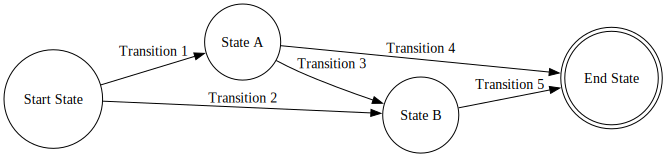

In [15]:
# Definieer stages
states = ['Start State', 'State A', 'State B', 'End State']
accepting_states = ['End State']  # Terminal states

# Definieer transitions
transitions = {
    ('Start State', 'Transition 1'): 'State A',
    ('Start State', 'Transition 2'): 'State B',
    ('State A', 'Transition 3'): 'State B',
    ('State A', 'Transition 4'): 'End State',
    ('State B', 'Transition 5'):'End State'
}

# Creeer diagram
automaton_1 = create_finite_automaton(states, accepting_states, transitions)
display(automaton_1)

In [16]:
# Mocht je een foutmelding krijgen, dan kan het zijn dat de directory van GraphViz niet in de System Environment Variables staat. 
# Onderstaande code lost dat probleem op (check wel ff of de directory klopt!)

#import os 

#os.environ["PATH"] += os.pathsep + r'C:\Applications\GraphVis\bin'

Het proces start vanuit de Start State. Vanuit die state zijn er twee transitions mogelijk, naar State A en B. Vanuit State A is het mogelijk om naar State B te gaan maar andersom is niet mogelijk. Denk aan een loket en een rij: vanuit een rij kun je naar een loket gaan maar je zult nooit van een loket terug naar een rij gaan. Vanuit beide states is er een transition naar de End State, te herkennen aan de dubbele rand. Hier eindigt het proces.

### Model vs werkelijkheid
Het 100% perfect modelleren van een organisatieproces is niet mogelijk én niet nodig. Het is belangrijk om te bepalen welke events vanuit de echte wereld belangrijk genoeg zijn om te simuleren en welke niet. Het bepalen welke events relevant zijn en welke niet, is een belangrijk onderdeel bij de kennisrepresentatie. Te weinig events modelleren zorgt ervoor dat de simulatie niet waarheidsgetrouw genoeg is en dat de gegenereerde data niet representatief is. Teveel events modelleren zorgt voor een te complexe simulatieomgeving die niet goed gemodelleerd kan worden. 

Bij het modelleren van een ziekenhuis is het bijvoorbeeld belangrijk wanneer een patiënt bij het ziekenhuis arriveert, opgenomen wordt en (hopelijk) ontslagen wordt, maar het is niet nodig om te modelleren wanneer patiënten naar het toilet gaan, wanneer er bezoek komt of wanneer ze eten. Qua resources zijn met name het personeel en bedden belangrijk, maar bepaalde hulpmiddelen of medicijnen vaak niet.

### Voorbeeld supermarkt
Stel dat een supermarkt zelfscankassa's wilt introduceren, dan is een belangrijke vraag: hoeveel zelfscankassa's zijn er nodig? En hoeveel traditionele kassa's moeten er behouden worden. Een simulatie van het proces van de kassa's kan helpen om verschillende scenario's te doorlopen en vergelijken. 

Een Finite-state machine diagram voor dit proces ziet er als volgt uit:

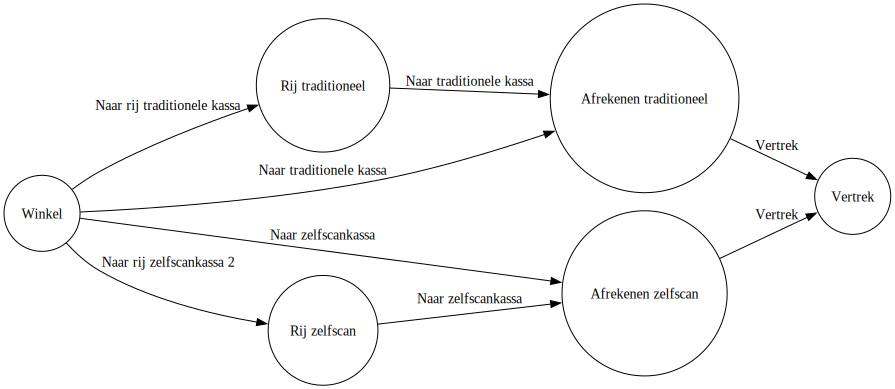

In [17]:
# Definieer states
states = ['Winkel', 'Rij traditioneel', 'Rij zelfscan', 'Afrekenen traditioneel', 'Afrekenen zelfscan', 'Vertrek']
accepting_states = ['End State']  # Terminal states

# Definieer transitions
transitions = {
    ('Winkel', 'Naar rij traditionele kassa'): 'Rij traditioneel',
    ('Winkel', 'Naar rij zelfscankassa 2'): 'Rij zelfscan',
    ('Winkel', 'Naar traditionele kassa'): 'Afrekenen traditioneel',
    ('Winkel', 'Naar zelfscankassa'): 'Afrekenen zelfscan',
    ('Rij traditioneel', 'Naar traditionele kassa'): 'Afrekenen traditioneel',
    ('Rij zelfscan', 'Naar zelfscankassa'): 'Afrekenen zelfscan',
    ('Afrekenen traditioneel', 'Vertrek'): 'Vertrek',
    ('Afrekenen zelfscan', 'Vertrek'): 'Vertrek'
}

# Creeer diagram
automaton_2 = create_finite_automaton(states, accepting_states, transitions)
display(automaton_2)

De volgende afwegingen zijn gemaakt bij het bepalen welke events wel of niet gemodelleerd moeten worden:
- Het is niet nodig om het gedrag in de schappen te modelleren want de schappen zijn niet relevant voor het vraagstuk, enkel de kassa's. Het is enkel belangrijk om te simuleren dat mensen in een rij kunnen wachten en moeten afrekenen. 
- Het is ook niet nodig om in dit model elke rij en kassa apart te modelleren. Dat kan wel maar maakt de simulatie nodeloos complex: je moet dan voor elk scenario een apart model maken. We gaan later zien hoe we het aantal resources kunnen instellen en daarmee meerdere kassa's kunnen simuleren.

## Experimenten uitvoeren
Om experimenten uit te voeren en simulaties te draaien is data nodig. Het is noodzakelijk informatie te hebben over de instroom van *entiteiten* bij de start state, wanneer én welke transitions plaats vinden en hoe lang deze entiteiten in een bepaalde state blijven.  

### Historische data vs synthetische data
Er zijn twee manieren voor het verzamelen van data. Ten eerste kan er gewerkt worden met data die in het verleden verzameld is. Voor een bepaalde tijdsperiode is er data beschikbaar met de instroom van entiteiten en de timing van bepaalde events. Denk bijvoorbeeld aan de instroom van patiënten en hoe lang ze verblijven in het ziekenhuis.

Ten tweede kan er data gegenereerd worden: dat noemen we synthetische data. Het genereren van synthetische gebeurt op basis van historische data. Stel dat je een dataset hebt met het aantal bezoekers aan een pretpark, dan kun je met een aantal kenmerken van die dataset (bijvoorbeeld het type verdeling, centum- en spreidingsmaten), nieuwe data gegenereren. Het voordeel is dat je onbeperkt veel data kunt genereren maar ook met de data kunt spelen. Je zou bijvoorbeeld een groeiende of dalende populariteit van het pretpark kunnen simuleren.

In dit college maken we gebruik van historische data en in college 3 maken we gebruik van synthetische data.

### Discrete events versus continuous events
We maken daarnaast onderscheid tussen *discrete* en *continue* events. Bij discrete events is er sprake van discrete of categoriale data zoals de state van een entiteit of de instroom (*x* entiteiten per tijdseenheid *y*). Denk aan een instroom per uur, minuut of seconde. 

Bij continue events is er sprake van veranderingen over de tijd waar geen events voor nodig zijn, denk bijvoorbeeld aan het simuleren van de zwaartekracht waarbij de hoogte van een object dat aan het vallen is gesimuleerd wordt. Continue events zijn essentieel bij Reïnforcement Learning (denk aan alle natuurkundige wetten die gesimuleerd moeten worden) of processen met vloeistoffen of gassen (denk aan pijpleidingen). 

![alt text](https://www.researchgate.net/profile/Tatiane-Stellet-Machado/publication/322530271/figure/fig31/AS:670467866247190@1536863404782/Main-differences-between-continuous-and-discrete-event-simulation-Source-Adapted-from.jpg "https://www.researchgate.net/figure/Main-differences-between-continuous-and-discrete-event-simulation-Source-Adapted-from_fig31_322530271")

Wij kijken enkel naar discrete events. 

### Discrete Event Simulation (DES)
Wanneer er een simulatieomgeving is en data beschikbaar is, is de volgende stap om de data aan de omgeving te voeden zodat de events plaats kunnen vinden. Discrete Event Simulation (DES) gaat hierover: het simuleren van alle events in een simulatie. Met de *incremental time progression* aanpak wordt per tijdseenheid bekeken welke events uitgevoerd moeten worden. Het kan zo zijn dat op een bepaald tijdstip geen nieuwe instoom is en er geen andere events plaats vinden waardoor de situatie hetzelfde blijft. Bij simulaties met veel data en veel states kunnen dit soort *lege* tijdstappen vervelend zijn voor de performance. Er zijn ook geavanceerde methodes zoals *next-event time progression* waarbij enkel niet-lege stappen gesimuleerd worden. Hierbij wordt o.a. gebruik gemaakt van lijsten met toekomstige events. 

Wij zullen focussen op incremental time progression.

### Voorbeeld experimenten uitvoeren bij een supermarkt
De supermarkt beschikt over historische data van een aantal dagen die verzameld is met camera's. Voor elk moment van de dag is vastgelegd hoeveel mensen de winkel binnen komen, maar die cijfers zijn niet interessant voor onze simulatie: enkel informatie over de kassa's is interessant. 

Met beeldherkenning zijn individuen bij de kassa's herkend en van elk individu is bekend wanneer ze bij de kassa arriveerden, hoe lang ze in de rij stonden en hoe lang het afrekenen duurde. De tijd in de rij is niet interessant want deze kun je afleiden door de tijd van het afrekenen van de mensen voor die persoon op te tellen. Deze berekening is wel bruikbaar, omdat in de simulatie gespeeld kan worden met het aantal kassa's. Het tijdstip bij de kassa en de tijd die het afrekenen in beslag nam zijn wel interessant want dat bepaalt de instroom bij de kassa en hoe lang het event afrekenen gaat duren. Hiermee kun je de wachttijd in de rij simuleren bij meer of minder kassa's.

Daarnaast zijn er ook gegevens van andere supermarkten die al zelfscankassa's hebben: er zijn cijfers bekend over het percentage klanten dat gebruik maakt van traditionele kassa's en van zelfscankassa's en de gemiddelde duur van het afrekenen bij een zelfscankassa. Bij andere supermarkten maakt 70% van de klanten gebruik van de zelfscankassa's. Dit percentage kan gebruikt worden als kans voor het willekeurig bepalen van bij welke kassa deze gaat aansluiten. Het is handig om meerdere runs van een simulatie te draaien omdat je met random waardes gaat werken. Dit komt in het tweede college aan bod.

## Analytics
Analytics gaat over het analyseren van data met als doel om organisaties te ondersteunen bij het maken van bepaalde beslissingen. Het toonaangevende adviesbureau Gartner heeft vier vormen van analytics beschreven:

![alt text](../afbeeldingen/Simulatie/gartner.png "Verschillende vormen van analytics")

- **Descriptive analytics** is de meest simpele variant. Hierbij wordt historische data verzameld en gevisualiseerd. Hierbij krijgt een organisatie inzicht in resultaten uit het verleden. Het gaat hier puur en alleen om het creëren van overzicht waarbij bijvoorbeeld data van verschillende afdelingen samengevoegd wordt om tot een totaaloverzicht te komen of om data van verschillende jaren te vergelijken.
- **Diagnostic analytics** gaat een stapje verder en helpt bij het verklaren waarom de resultaten uit het verleden zo waren als ze zijn. Dit is vaak handwerk waarbij mensen op zoek gaan naar *verborgen informatie* in de data door op een slimme manier data te visualiseren of analyseren, bijvoorbeeld door data te filteren of te groeperen.
- **Predictive analytics** maakt gebruik van machine learning waarbij modellen getraind zijn op de historische data en waarmee de toekomst voorspeld kan worden. Een algoritme heeft hier hetzelfde gedaan als een mens bij diagnostic analytics, namelijk het vinden van de verborgen kennis binnen de data. Deze kennis ligt vast in het model en kan gebruikt worden om de toekomst te voorspellen.
- **Prescriptive analytics** is de laatste stap en gaat over het daadwerkelijk inzetten van verschillende vormen van analytics om de bedrijfsvoering te sturen en om resultaten te behalen. Dit gaat over het analyseren van de resultaten van de eerste drie vormen van analytics en bepalen welke acties het beste zijn voor een organisatie.

### Analytics bij simulatie
Simulaties met historische data vallen onder diagnostic analytics. Er kan worden verklaard wat de invloed van de resources was op bepaalde resultaten die behaald zijn én hoe betere resultaten behaald hadden kunnen worden.
Simulaties met synthetische data vallen onder predictive analytics (omdat hiermee toekomstige scenario's geschetst worden) én prescriptive analystics (het daadwerkelijk maken van een keuze voor het beste scenario).

### Kosten vs baten
Simulaties helpen organisaties bij het maken van beslissingen waarbij een balans tussen *kosten* en *baten* gezocht wordt.
- **Kosten** Het produceren van een product of het leveren van een dienst brengt bepaalde kosten met zich mee zoals personeelskosten, productiekosten of kosten voor hulpmiddelen zoals een pand en apparaten.
- **Baten** Voor bedrijven die een product verkopen of een dienst leveren zijn de belangrijkste baten de inkomsten. Voor non-profit organisaties over overheidsinstellingen zijn er andere baten zoals de tevredenheid van klanten. 

Idealiter zijn de baten hoger dan de kosten. Organisaties hebben geen directe invloed op de baten, ze zijn afhankelijk van consumenten of bedrijven die hun producten of diensten afnemen. Met een hoge kwaliteit, lage prijzen, marketing, etc. wordt getracht om de baten te maximaliseren.
Organisaties hebben wel een directe invloed op het minimaliseren van kosten door de inzet van verschillende resources. Denk aan de hoeveelheid personeel, dure of goedkopere grondstoffen, etc. Hierbij moet wel rekening worden gehouden met de kwaliteit van het product of de dienst. Een restaurant dat te weinig personeel inzet heeft weliswaar lagere kosten maar wanneer de kwaliteit van het eten en de bediening omlaag gaat, zal dat ook effect hebben op de baten. Teveel personeel inzetten zorgt voor te hoge kosten dus het is zaak om precies genoeg personeel in te zetten om de beoogde kwaliteit te leveren.

### Key Performance Indicatoren
Het is dus zaak voor organisaties om een balans te vinden tussen de resources die ingezet worden en de kwaliteit van het product of dienst. De kwaliteit wordt meetbaar gemaakt met KPI's. Organisaties kunnen de KPI's van verschillende momenten vergelijken om te bepalen of bepaalde interventies hebben gezorgd voor een verbetering of niet. Ook kunnen KPI's gebruikt worden om de scenario's van verschillende simulaties onderling te vergelijken.

### Voorbeeld supermarkt
Bij de supermarkt zijn er verschillende resources met kosten:
- Personeel bij beide type kassa's
- Kosten van beide type kassa's

De baten waar we hier naar kijken zijn niet het aantal verkochte producten want dat staat los van dit vraagstuk. Het gaat vooral over de tevredenheid van klanten bij de kassa's. Deze kan uitgedrukt worden in de wachttijd bij beide kassa's. Stel dat er maar 1 traditionele kassa is en 20 zelfscankassa's met één personeelslid, dan zijn de personeelskosten erg laag, maar wanneer er dan een gigantische rij ontstaat bij de traditionele kassa is dat slecht voor de klanttevredenheid. 

Simuleren kan helpen om te bepalen welke samenstelling van resources (= het aantal traditionele kassa's en het aantal zelfscankassa's) optimaal is. De werkwijze is als volgt:
- Er worden verschillende scenario gesimuleerd.
- Voor elk scenario worden KPI's bepaald voor de kosten: denk bijvoorbeeld aan de kosten van traditionele kassa's, kosten van zelfscankassa's en de totale kosten.
- Voor elk scenario worden KPI's bepaald voor de baten: denk aan de gemiddelde en/of totale wachttijd van beide type kassa's.
- De supermarkt kan op basis van de KPI's verschillende scenario's vergelijken en bepalen wat het meest optimale scenario is. Waarschijnlijk is dat het scenario waarbij de gemiddelde wachttijd acceptabel genoeg is voor een beoogde klanttevredenheid en waarbij de kosten dus zo laag mogelijk zijn.

## Opdrachten ICU
De opdrachten bij dit college richten zich op een simulatie van een intensive care unit (ICU) in een ziekenhuis om te bepalen hoeveel resources er nodig zijn om de doelstellingen te behalen.

### Deel 1 - Kennisrepresentatie
De belangrijkste kenmerken van de ICU zijn als volgt:
- De ICU heeft een bepaald aantal bedden. Deze bedden zijn de enige resource waar we rekening mee houden. We gaan er vanuit dat er voor elk bed een vast aantal personeelsleden nodig is. De kosten kunnen dus bepaald worden door enkel naar het aantal bedden te kijken.
- Er is een bepaalde instroom van patiënten met drie aandoeningen: A, B en C. 
- Er is ook een bepaalde ligtijd van patiënten: dat is de duur van hun verblijf op de ICU waarna ze beter zijn en naar huis gaan. 

De belangrijkste processtappen zijn als volgt:
- Wanneer patiënten zich melden bij de ICU wordt gekeken of er een bed vrij is. 
- Als dat niet zo is, moet een patiënt eerst plaats nemen in de wachtkamer. 
- Wanneer patiënten goed genoeg hersteld zijn, kunnen ze uiteraard ook weer naar huis.

**Opdracht 1.1.** Werk op basis van bovenstaande uitleg een Finite-state machine diagram uit m.b.v. Graphviz.

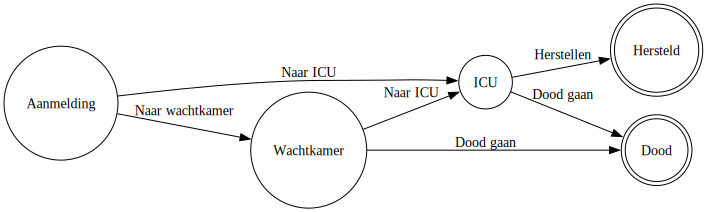

In [18]:
# Opdracht 1.1

# Definieer states
states_1_1 = ["Aanmelding", "Wachtkamer", "ICU", "Hersteld", "Dood"]
accepting_states_1_1 = ["Hersteld", "Dood"]

# Definieer transitions
transitions_1_1 = {
    ('Aanmelding', 'Naar wachtkamer'): 'Wachtkamer',
    ('Aanmelding', 'Naar ICU'): 'ICU',
    ('Wachtkamer', 'Naar ICU'): 'ICU',
    ('Wachtkamer', 'Dood gaan'): 'Dood',
    ('ICU', 'Herstellen'): 'Hersteld',
    ('ICU', 'Dood gaan'): 'Dood'
}

# Creeer diagram
opdracht_1_1 = create_finite_automaton(states_1_1, accepting_states_1_1, transitions_1_1)
display(opdracht_1_1)

**Opdracht 1.2.** Bekijk ```patient.py``` in de ```S3 DATASIM``` library en ga op zoek naar aanvullende states en transitions die niet hierboven beschreven zijn. Vul jouw Finite-state machine diagram daarna aan.

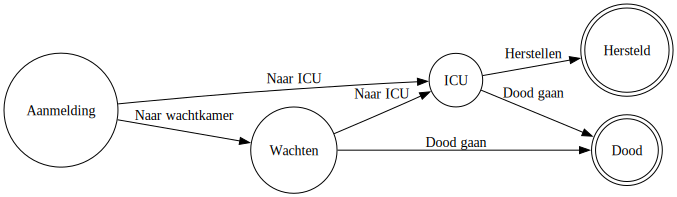

In [20]:
# Opdracht 1.2

# Definieer states
states_1_2 = ["Aanmelding", "Wachten", "ICU", "Hersteld", "Dood"]
accepting_states_1_2 = ["Hersteld", "Dood"]

# Definieer transitions
transitions_1_2 = {
    ('Aanmelding', 'Naar wachtkamer'): 'Wachten',
    ('Aanmelding', 'Naar ICU'): 'ICU',
    ('Wachten', 'Naar ICU'): 'ICU',
    ('Wachten', 'Dood gaan'): 'Dood',
    ('ICU', 'Herstellen'): 'Hersteld',
    ('ICU', 'Dood gaan'): 'Dood'
}

# Creeer diagram
opdracht_1_2 = create_finite_automaton(states_1_2, accepting_states_1_2, transitions_1_2)
display(opdracht_1_2)

### Deel 2 - KPI's
De doelstelling van de ICU is als volgt: *We willen patiënten zo snel mogelijk en zo goed mogelijk helpen, maar er moet ook gelet worden op de kosten.* 

Dat is natuurlijk best een vage doelstelling waar jij als data scientist (in wording) niet zoveel kunt. Het is belangrijk dat er *meetbare* KPI's komen waarmee je kunt bepalen wat de meest optimale variant van de ICU is. 

**Opdracht 2.1** Stel voor de ICU KPI's op. Denk zowel aan KPI's voor de kosten, als voor de baten. 
*Tip:* hou in je achterhoofd dat je deze KPI's gaat gebruiken om te bepalen wat de meest optimale variant van de ICU is.

**Opdracht 2.2** Bepaal welke parameters bestaan voor de ICU. Dat zijn *knoppen* waaraan je kunt draaien en zaken waarmee je scenario's van elkaar kunt onderscheiden. Een belangrijke parameter is natuurlijk het aantal bedden op de ICU maar er zijn natuurlijk meer parameters die je kunt instellen.  

Voor kosten:
- asdf  
Voor baten:
- asdf

2.2  
- Het aantal bedden
- De instroom en uitstroom van patienten
- Het aantal personeel

### Deel 3 - Simuleren en analyseren
Er is een dataset beschikbaar met historische data over de instroom en ligtijd van patiënten: ```simulatiedata.csv```. De ```icu```-entiteit die aangemaakt wordt in ```icu.py``` roept dit bestand aan om patiëntdata te verzamelen. Deze data dient als input voor de simulatie voor een bepaald experiment.

De enige resource waar je mee kunt experimenteren, is het aantal bedden. In ```icu.yaml``` kun je onder ```bed.slots``` het aantal resources ingeven. Door onder ```Run and Debug``` voor ```Debug with Streamlit``` te kiezen, wordt het experiment gestart en resultaten getoond in een Streamlit dashboard.

**Opdracht 3.1** Zet een experiment op waarbij je simulaties runt met verschillende aantallen resources. Het doel van het experiment is om te bepalen wat het scenario is met het minimum aantal bedden waarbij er **geen** patiënten overlijden. **Merk op**: je hebt een flinke ICU nodig met meer dan 150 bedden.

**Opdracht 3.2** Vergelijk het hierboven gevonden *optimale* scenario met een scenario met 25 bedden **meer** en 25 bedden **minder**. Wat valt op qua wachtrij en qua gemiddeld gebruik van de bedden? 

## Volgende college
De visualisatie die nu getoond wordt heeft allerlei beperkingen. In het volgende college gaan we aan de slag met het bewerken van de data, het combineren van de data van verschillende runs en het aggregeren van data plus het maken van diverse visualisaties waarmee de KPI's beter en sneller in kaart gebracht kunnen worden zodat beslissingen beter en sneller genomen kunnen worden.